In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans

In [2]:
wine = pd.read_csv("/content/wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.data = wine.iloc[:,2:]
wine.data.head()
WINE = wine.data.values
WINE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


array([[1.710e+00, 2.430e+00, 1.560e+01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine_normal = scale(WINE)

In [5]:
wine_normal

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [7]:
pca_values

array([[-3.07857252, -1.2192618 , -0.38806977, ...,  0.11988943,
         0.88805186, -0.07321096],
       [-2.19079587,  0.66456824, -1.92210947, ..., -0.18027824,
         0.28014967,  0.01377333],
       [-2.45644079, -1.5058111 ,  0.55648903, ..., -0.48294544,
        -0.13761134,  0.02907391],
       ...,
       [ 2.88825847, -2.42076977, -1.66541827, ...,  0.45903343,
         0.48941557,  0.08736234],
       [ 2.55190832, -2.08637202, -1.17521266, ...,  0.42545762,
         0.26549105, -0.01447492],
       [ 3.53573264, -2.12257387,  0.88160906, ..., -0.04465287,
         0.07663817, -0.33835467]])

In [8]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [9]:
pca_values

array([[-3.07857252, -1.2192618 , -0.38806977, -0.23952306,  0.72619786,
        -0.05320974],
       [-2.19079587,  0.66456824, -1.92210947, -0.29141065, -0.36571827,
        -1.26039775],
       [-2.45644079, -1.5058111 ,  0.55648903,  0.72359583, -0.5295299 ,
         0.24579966],
       ...,
       [ 2.88825847, -2.42076977, -1.66541827,  0.24630546,  0.74746192,
         0.10658114],
       [ 2.55190832, -2.08637202, -1.17521266, -0.73770715,  0.16147361,
         0.94319371],
       [ 3.53573264, -2.12257387,  0.88160906,  0.63303374, -0.7277836 ,
         0.34140339]])

In [10]:
var = pca.explained_variance_ratio_
var

array([0.38612318, 0.16881157, 0.11376556, 0.07656743, 0.06636326,
       0.05077993])

In [11]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.61, 55.49, 66.87, 74.53, 81.17, 86.25])

In [12]:
pca.components_

array([[ 0.25929907,  0.01550401,  0.23457717, -0.12997254, -0.39396388,
        -0.4262194 ,  0.30156031, -0.31599638,  0.12050505, -0.31314859,
        -0.38744   , -0.26504376],
       [-0.22363659, -0.45446769, -0.08389744, -0.41000066, -0.14109614,
        -0.07041646, -0.01025314, -0.13306564, -0.53637656,  0.27207746,
         0.11846639, -0.38712793],
       [ 0.04407439,  0.54359695,  0.6257736 , -0.04358717,  0.1067167 ,
         0.13134819,  0.21696829,  0.07955089, -0.30000831,  0.18463194,
         0.2156754 , -0.23751456],
       [ 0.53647394, -0.20779976,  0.06350945, -0.37846661,  0.20173256,
         0.15565564, -0.1863573 ,  0.3918301 ,  0.06138937, -0.41833833,
         0.19055586, -0.23124193],
       [ 0.12527868, -0.11626212,  0.17317714,  0.65986637, -0.18791061,
        -0.11683611, -0.54518489,  0.03906619, -0.27707183, -0.09913243,
         0.00238728, -0.26656873],
       [-0.5878703 , -0.19640955,  0.26881966,  0.04352827,  0.01066728,
        -0.019332  ,  

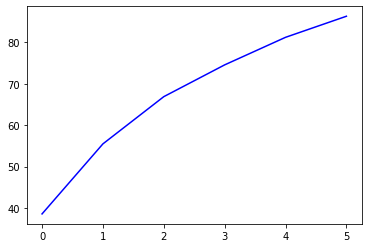

In [13]:
plt.plot(var1,color="blue")

In [14]:
pca_values[:,0:1]

array([[-3.07857252],
       [-2.19079587],
       [-2.45644079],
       [-3.42275012],
       [-0.94897588],
       [-2.76731538],
       [-2.18375478],
       [-1.8263214 ],
       [-2.19383381],
       [-2.59000186],
       [-3.26089058],
       [-1.55488981],
       [-1.96567565],
       [-3.14743458],
       [-4.00629989],
       [-2.13051424],
       [-1.87351026],
       [-1.70365337],
       [-3.238178  ],
       [-1.94408078],
       [-2.94642239],
       [-1.09489837],
       [-2.4456023 ],
       [-1.70081887],
       [-1.72046805],
       [-0.96736682],
       [-1.68327066],
       [-1.18897314],
       [-2.0440134 ],
       [-2.09994017],
       [-2.34841466],
       [-2.52075473],
       [-1.5334142 ],
       [-1.7198793 ],
       [-1.3083414 ],
       [-1.83755336],
       [-1.3168969 ],
       [-1.11112978],
       [-1.52935162],
       [-2.26855413],
       [-2.48051126],
       [-0.59309439],
       [-2.8906988 ],
       [-0.41033555],
       [-2.10640792],
       [-0

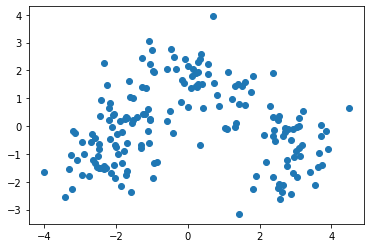

In [15]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

In [16]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

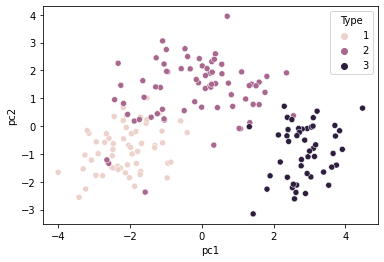

In [17]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

In [18]:
wine = pd.read_csv("/content/wine.csv")

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.iloc[:,1:])

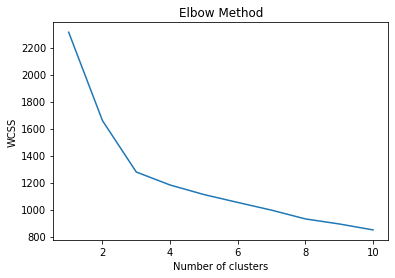

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_wine_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
clusters_new.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [23]:
wine['clusterid_new'] = clusters_new.labels_

In [24]:
clusters_new.cluster_centers_

array([[-0.92047428, -0.54205238, -0.65270611,  0.16803997, -0.71111627,
        -0.46194286, -0.25847272,  0.35865056, -0.45114377, -0.92988738,
         0.51334104,  0.06374748, -0.79969176],
       [-0.68677659,  0.0718851 ,  0.29602101,  0.4036857 , -0.03451498,
         0.73975378,  0.68092069, -0.54732939,  0.71427661, -0.67691821,
         0.26816287,  0.71544309, -0.55751515],
       [ 0.88754384, -0.3948435 ,  0.1441961 , -0.829797  ,  0.60941526,
         0.8430118 ,  0.92772917, -0.62422186,  0.64177809,  0.20056735,
         0.49610656,  0.71821311,  1.21787802],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461]])

In [25]:
wine.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727
1,1,1.821429,12.444643,2.416429,2.447500,20.839286,99.250000,2.756786,2.707500,0.293929,1.998571,3.493214,1.018571,3.118214,571.821429
2,2,1.052632,13.719123,1.896491,2.405965,16.731579,108.421053,2.821228,2.953333,0.284386,1.957193,5.521754,1.070526,3.120175,1129.333333
3,3,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [26]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3
